In [136]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr # helps to pull the yahoo finance data
from sklearn.model_selection import train_test_split # helps to split the data into train and test
from sklearn.preprocessing import StandardScaler # helps to scale the data
from sklearn import metrics # helps to evaluate the model
from sklearn.naive_bayes import GaussianNB # helps to build the model
from sklearn.linear_model import LogisticRegression # helps to build the model
from sklearn.svm import SVC
from sklearn import preprocessing
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydot

In [59]:
# import the data from diabetes.csv
data = pd.read_csv('diabetes.csv')

In [60]:
# analyse the data
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:

data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [62]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [63]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [64]:
# data cleaning and preprocessing
# this will remove any rows that have 0 values in the columns but thats not what we want
#data = data[(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] != 0).all(axis=1)]

In [65]:
# replace certain column's values that contain 0 with 'none'
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
# check for null values
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<AxesSubplot: title={'center': 'Pregnancies'}>,
        <AxesSubplot: title={'center': 'Glucose'}>,
        <AxesSubplot: title={'center': 'BloodPressure'}>],
       [<AxesSubplot: title={'center': 'SkinThickness'}>,
        <AxesSubplot: title={'center': 'Insulin'}>,
        <AxesSubplot: title={'center': 'BMI'}>],
       [<AxesSubplot: title={'center': 'DiabetesPedigreeFunction'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Outcome'}>]], dtype=object)

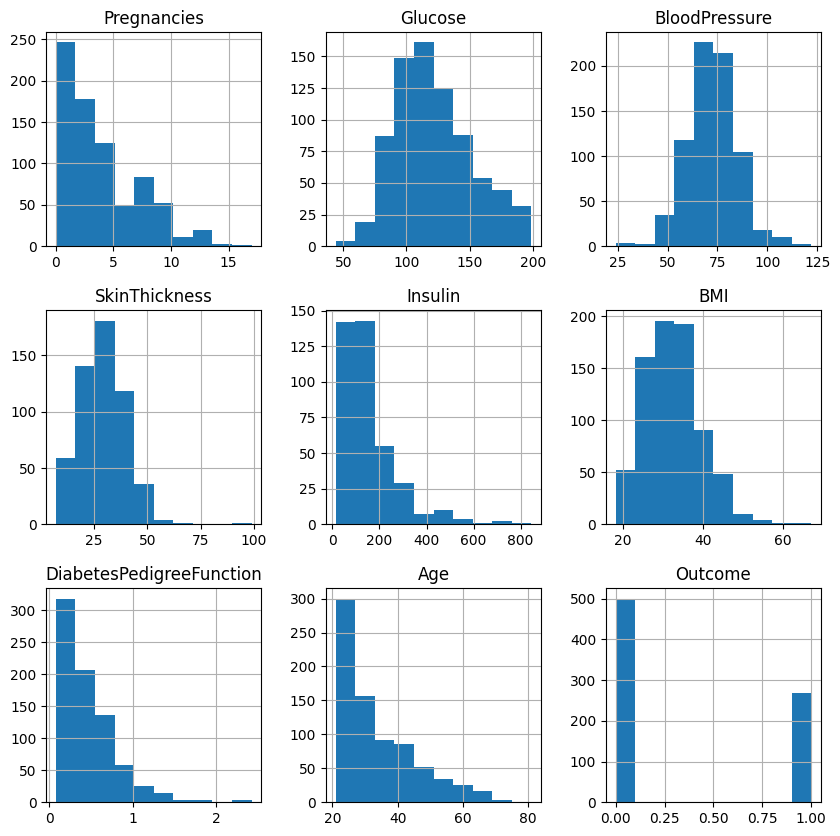

In [66]:
# view the data in a histogram to see which null values to replace with the mean or the median
data.hist(figsize=(10,10))

In [67]:
# replacing values...
# any column that has a normal distribution we are going to replace with the mean because its less affected by outliers
# any column that has a skewed distribution we are going to replace with the median because its less affected by outliers

# replace glucose and blood pressure null values with the mean
data['Glucose'].fillna(data['Glucose'].mean(), inplace=True)     # inplace = true means that the changes will be saved 
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace=True)

# replace the rest of the null values with the median
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace=True)
data['Insulin'].fillna(data['Insulin'].median(), inplace=True)
data['BMI'].fillna(data['BMI'].median(), inplace=True)


data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot: >

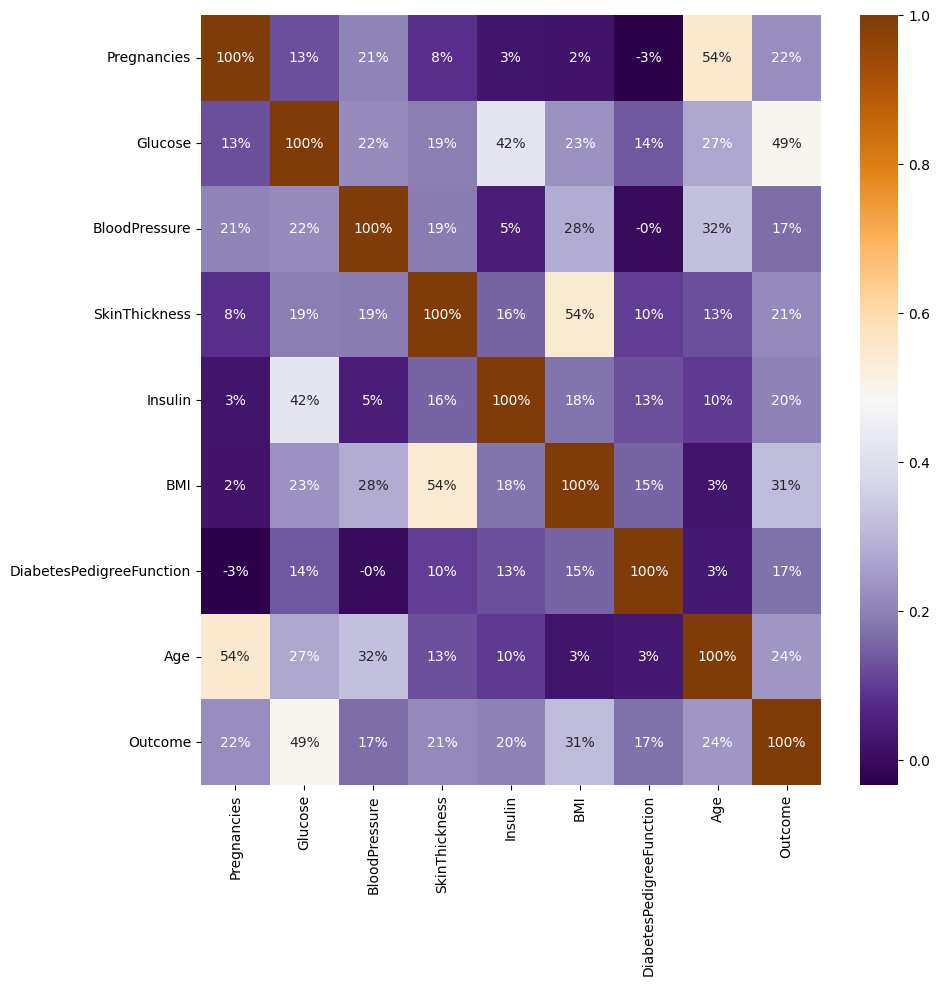

In [68]:
# lets see the correlation between the columns using a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.0%', cmap='PuOr_r')

<AxesSubplot: xlabel='Outcome', ylabel='count'>

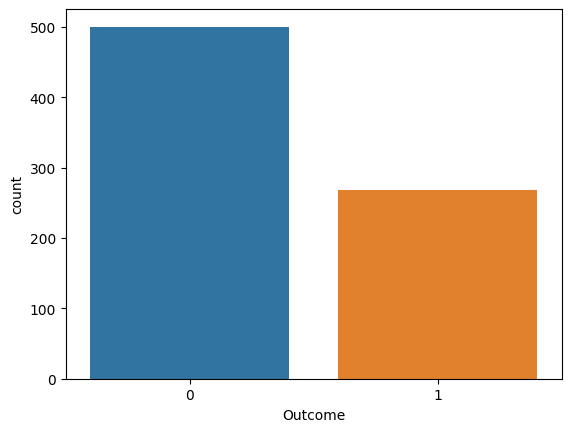

In [69]:
# count the number of people with and without diabetes (outcome column 1=true, 0=false)
data['Outcome'].value_counts()

#500 non-diabetic and 268 diabetic

# represent this is a graph
sns.countplot(x = 'Outcome', data= data)

In [70]:
# you can map the outcome column to a new column called 'diabetes' and use string data instead of 1 and 0
data['Diabetes'] = data['Outcome'].map({1:'diabetic', 0:'non-diabetic'})
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetes
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,diabetic
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,non-diabetic
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,diabetic
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,non-diabetic
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,diabetic


In [71]:
# predict if a patient has diabetes or not

# the data is ready to be used to train a model
# split the data into independent 'X' and dependent 'Y' variables
X = data.iloc[:, 0:8].values # does not include column 8 = the values to use to predict
Y = data.iloc[:, -1].values # only column 9  = the values to predict 

# split the data into 75% training and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [72]:
# scale the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
# classification algorithms
# logistic regression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [74]:
# make predictions
Y_pred = classifier.predict(X_test) # if you want to test new data this is where you input it
# put results in a dataframe
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df

,Actual,Predicted
0,diabetic,diabetic
1,non-diabetic,non-diabetic
2,non-diabetic,non-diabetic
3,diabetic,diabetic
4,non-diabetic,non-diabetic
...,...,...
149,diabetic,non-diabetic
150,non-diabetic,non-diabetic
151,diabetic,diabetic
152,non-diabetic,non-diabetic


In [75]:
# check the accuracy of the model
print('Accuracy: ', metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.8116883116883117


In [76]:
# confusion matrix
cm = metrics.confusion_matrix(Y_test, Y_pred) 
cm

array([[28, 19],
       [10, 97]])

In [77]:
# try SVM
# try K - nearest neighbor
# try decision tree
# try random forest

Accuracy:  0.8051948051948052


<AxesSubplot: >

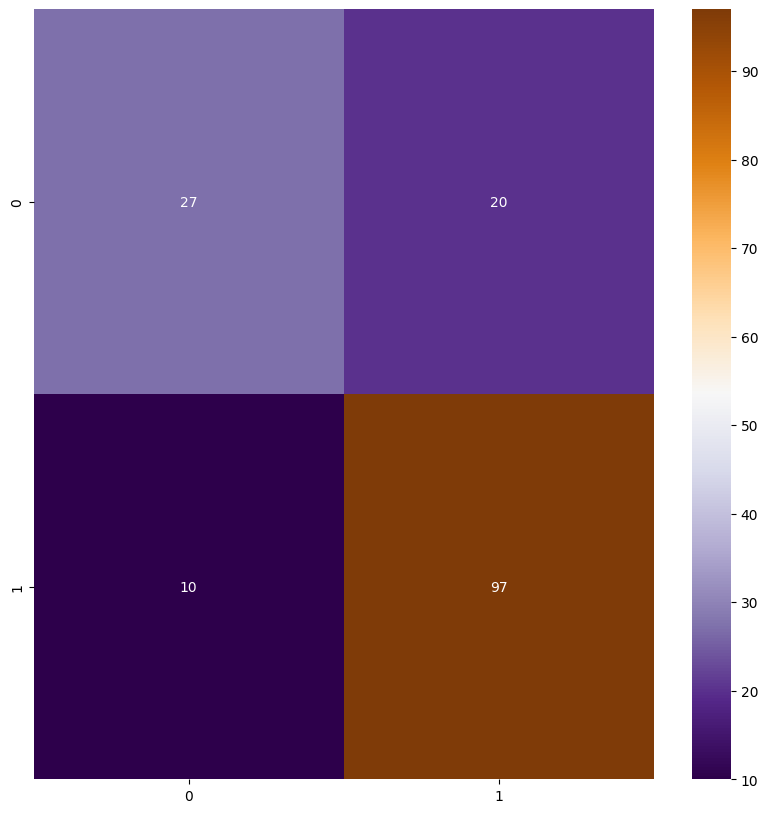

In [82]:
# try SVM 
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, Y_train)
# make predictions
Y_pred = classifier.predict(X_test)
# put results in a dataframe
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df
# check the accuracy of the model
print('Accuracy: ', metrics.accuracy_score(Y_test, Y_pred))
# confusion matrix
cm = metrics.confusion_matrix(Y_test, Y_pred)
cm
# plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='.0f', cmap='PuOr_r') 



In [134]:
# try K - nearest neighbor
# the data is ready to be used to train a model
# split the data into independent 'X' and dependent 'Y' variables
X = data.iloc[:, 0:8].values # does not include column 8 = the values to use to predict
Y = data.iloc[:, -2].values # only column 9  = the values to predict 

# split the data into 75% training and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# find the best k value
# find the square root of the number of rows in the data
k = sqrt(len(Y_test))
print(k)
# round the number up
k = round(k)
print(k)

knn_model = KNeighborsClassifier(n_neighbors=13) # define kNN model with k=3

knn_model.fit(X_train, Y_train) # fit kNN model

# Make prediction
y_pred = knn_model.predict(X_test)

# Accuracy
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))

# Root Mean Squared Error
print("RMSE:", sqrt(metrics.mean_squared_error(Y_test, y_pred)))


"""
---------------------------
Execute K-Means clustering
---------------------------
"""

kmeans = KMeans(n_clusters=3, n_init=15)
kmeans.fit(data)
print("WCSS: ", kmeans.inertia_)
print("Iternations until converged: ", kmeans.n_iter_)
print("Final centroids: ")
print(kmeans.cluster_centers_)
print("Cluster assignments ")
print(kmeans.labels_)

"""
---------------------------
Visualize clustering (Task 2)
---------------------------
"""

fig, ax = plt.subplots()
idxs = np.unique(kmeans.labels_)

for i in idxs:
    #Points of cluster
    points = data[kmeans.labels_==i,:]
    #Plot points
    plt.scatter(points[:,0], points[:,1])
    #Plot centroids
    plt.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], s=100, c='red')

#Aesthetics    
ax.set_title('K-Means clustering')
ax.set_xlabel(header[0])
ax.set_ylabel(header[1])


12.409673645990857
12
Accuracy: 0.7727272727272727
RMSE: 0.4767312946227962


ValueError: could not convert string to float: 'diabetic'

Accuracy (gini): 0.7142857142857143
Accuracy (entropy): 0.6883116883116883
Accuracy (depth): 0.7207792207792207


[Text(0.45170454545454547, 0.9166666666666666, 'Glucose <= 123.5\ngini = 0.461\nsamples = 614\nvalue = [393, 221]\nclass = non-diabetic'),
 Text(0.23295454545454544, 0.75, 'Age <= 28.5\ngini = 0.301\nsamples = 352\nvalue = [287, 65]\nclass = non-diabetic'),
 Text(0.125, 0.5833333333333334, 'BMI <= 30.95\ngini = 0.162\nsamples = 202\nvalue = [184, 18]\nclass = non-diabetic'),
 Text(0.06818181818181818, 0.4166666666666667, 'Pregnancies <= 7.0\ngini = 0.038\nsamples = 104\nvalue = [102, 2]\nclass = non-diabetic'),
 Text(0.045454545454545456, 0.25, 'DiabetesPedigreeFunction <= 0.672\ngini = 0.019\nsamples = 103\nvalue = [102, 1]\nclass = non-diabetic'),
 Text(0.022727272727272728, 0.08333333333333333, 'gini = 0.0\nsamples = 94\nvalue = [94, 0]\nclass = non-diabetic'),
 Text(0.06818181818181818, 0.08333333333333333, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = non-diabetic'),
 Text(0.09090909090909091, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = diabetic'),
 Text(0.181818

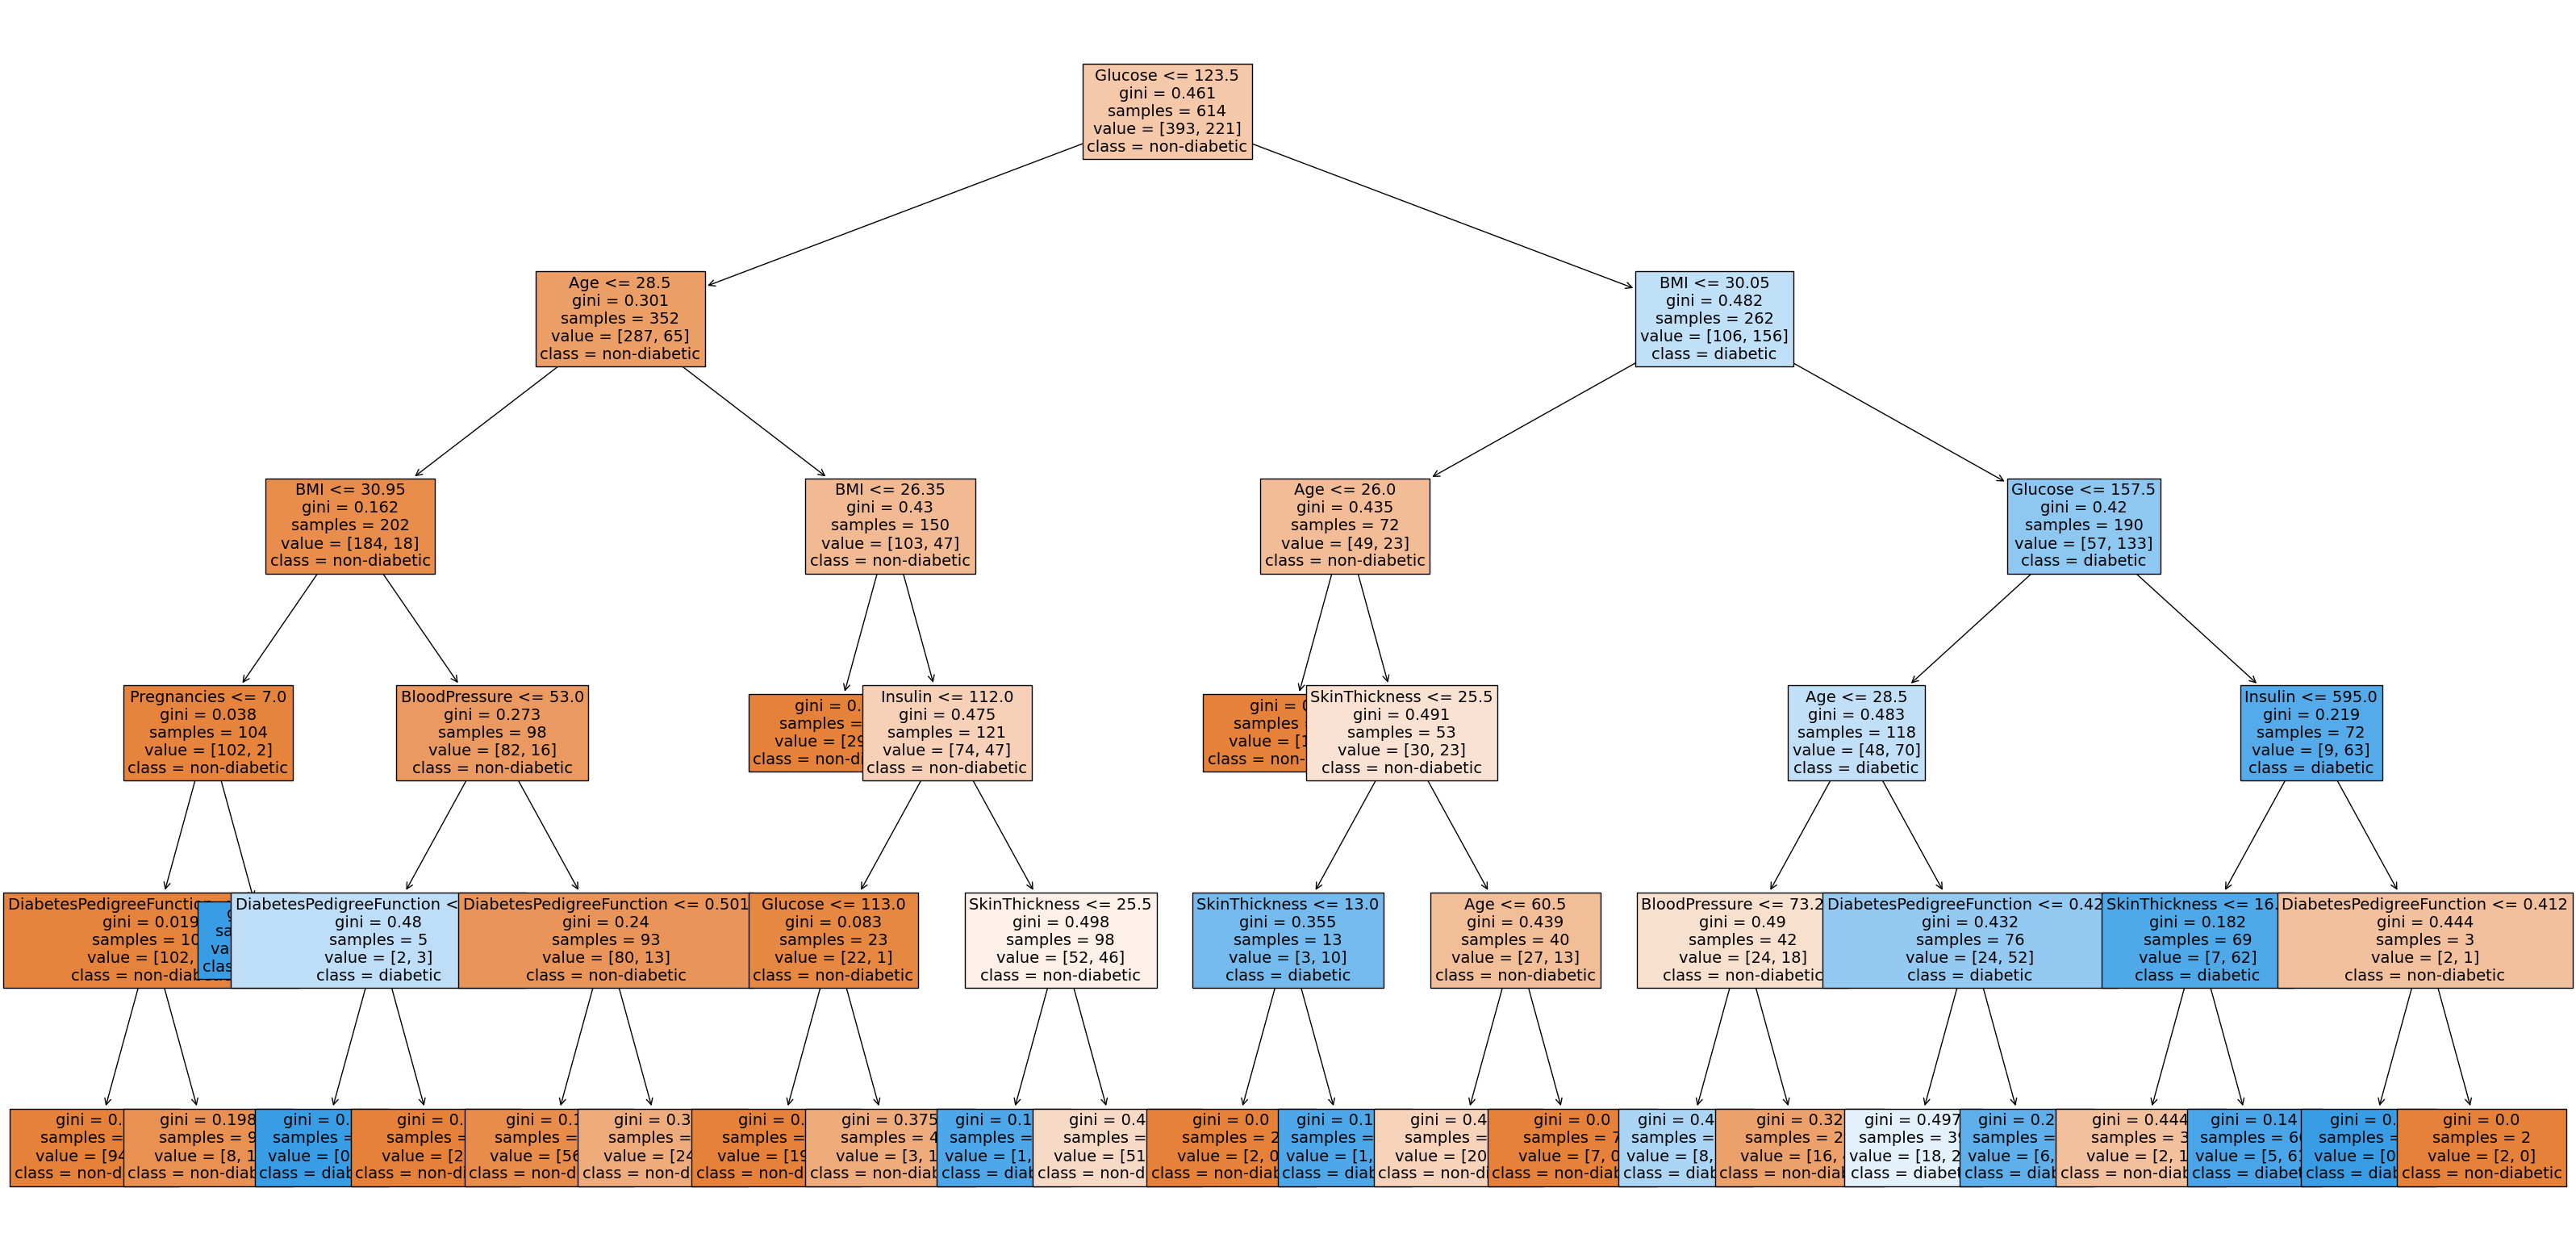

In [129]:
# try decision tree
# Create default Decision Tree classifer object
decisionTree_model_gini = DecisionTreeClassifier()

# Use entropy criterion
decisionTree_model_entropy = DecisionTreeClassifier(criterion="entropy")

# Use max depth of 3
decisionTree_model_depth = DecisionTreeClassifier(max_depth=5)

# Fit the trees
decisionTree_model_gini.fit(X_train,Y_train)
decisionTree_model_entropy.fit(X_train,Y_train)
decisionTree_model_depth.fit(X_train,Y_train)

# Make prediction
y_pred_gini = decisionTree_model_gini.predict(X_test)
y_pred_entropy = decisionTree_model_entropy.predict(X_test)
y_pred_depth3 = decisionTree_model_depth.predict(X_test)

print("Accuracy (gini):",metrics.accuracy_score(Y_test, y_pred_gini))
print("Accuracy (entropy):",metrics.accuracy_score(Y_test, y_pred_entropy))
print("Accuracy (depth):",metrics.accuracy_score(Y_test, y_pred_depth3))

# plot a decision tree
plt.figure(figsize=(40,20))
sk.tree.plot_tree(decisionTree_model_depth, filled=True, fontsize=14, feature_names=data.columns[0:8], class_names=['non-diabetic', 'diabetic'])
# label the tree


accuracy on training set: 1.000000
accuracy on test set: 0.792208


(0.0, 1.0)

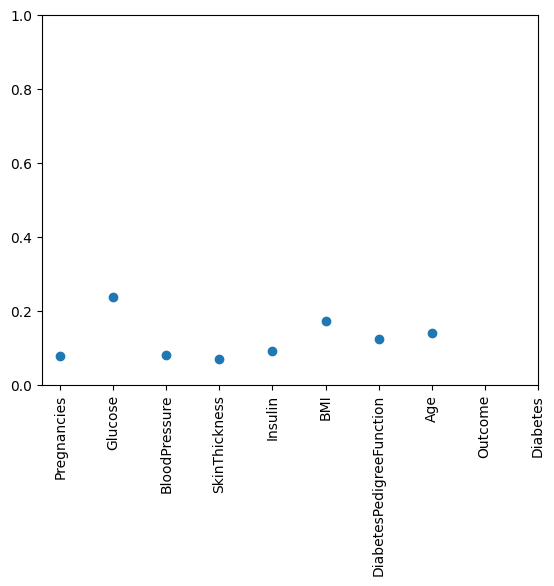

In [145]:
# try a random forest model 

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)#Evaluate the model:
print("accuracy on training set: %f" % rf.score(X_train, Y_train))
print("accuracy on test set: %f" % rf.score(X_test, Y_test))
rf.feature_importances_
plt.plot(rf.feature_importances_, 'o')
plt.xticks(range(data.shape[1]), data.columns, rotation=90)
plt.ylim(0, 1)

In [146]:
#Using only 5 nodes:
rf_5 = RandomForestClassifier(max_depth=5)
rf_5.fit(X_train, Y_train)
print("accuracy on training set: %f" % rf_5.score(X_train, Y_train))
print("accuracy on test set: %f" % rf_5.score(X_test, Y_test))

accuracy on training set: 0.850163
accuracy on test set: 0.811688


In [153]:
# Pull out one tree from the forest:
tree = rf_5.estimators_[5]
# Export the image to a dot file:
export_graphviz(tree, out_file = 'tree.dot', feature_names = data.columns[0:8], rounded = True, precision = 1, filled = True)
# Use dot file to create a graph:
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file:
graph.write_png('tree.png')

FileNotFoundError: [Errno 2] "dot" not found in path.